In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import LocallyLinearEmbedding, Isomap

import numpy as np

%run ../src/coil20_utils.py

## Loading data

In [2]:
all_imgs = load_images()
all_labels = np.arange(0, 1440, dtype=int) // 72

all_imgs.shape

(1440, 16384)

In [22]:
from sklearn.preprocessing import Normalizer 

imgs = Normalizer().fit_transform(
  all_imgs[:720:6, :])
labels = all_labels[:720:6]
label_names = np.array([
  'duck',
  'wedge',
  'car',
  'kitty',
  'box',
  'sports car',
  'wood brick',
  'bottle',
  'box',
  'vaseline'
])

colors = ['xkcd:neon green',
          'lightcoral',
          'xkcd:turtle green', 
          'xkcd:cobalt', 
          'xkcd:dusky pink', 
          'xkcd:lighter purple', 
          'xkcd:light cyan', 
          'xkcd:khaki', 
          'xkcd:green yellow', 
          'xkcd:purple gray', 
          'xkcd:very light blue', 
          'xkcd:buff',
          'xkcd:mushroom']

imgs.shape

# plotting utils

def signed_scatterplot(images):
  def plts(images):
    for c in np.unique(labels):
      idxs = labels == c
      yield plt.scatter(images[idxs, 0], images[idxs, 1], c=colors[c])
  plt.legend(plts(images), label_names)

/opt/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


## Display couple of images

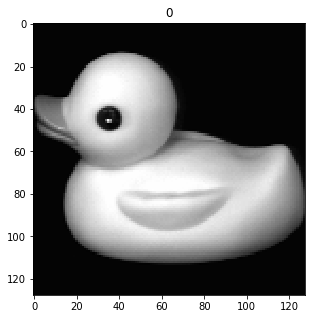

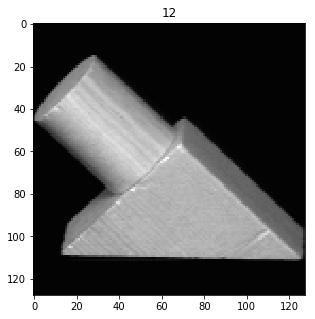

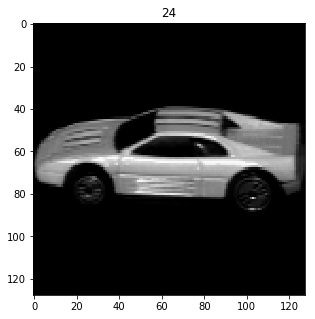

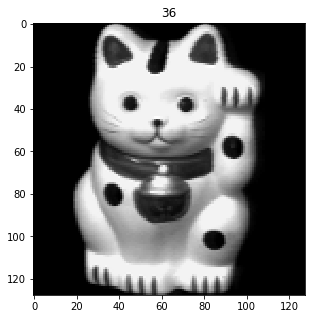

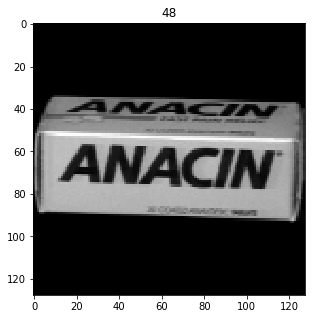

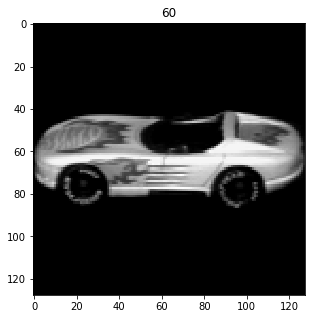

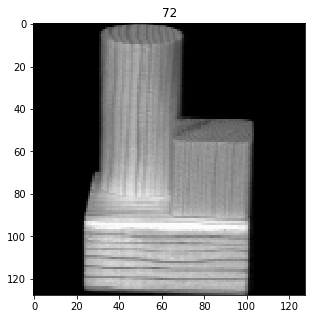

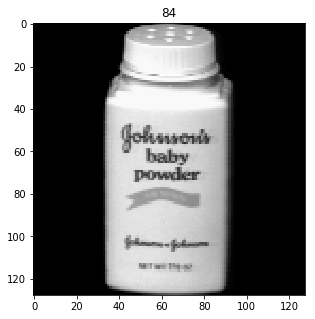

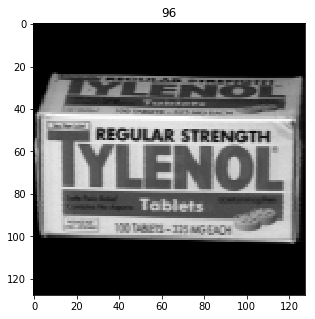

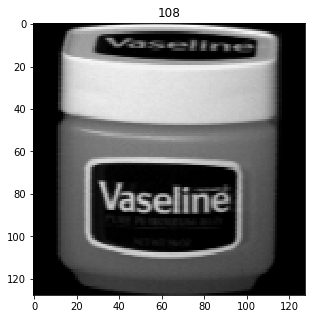

In [38]:
plt.rcParams['figure.figsize'] = (9, 5)

for i in range(0, 120, 12):
  plt.title(i)
  display_image(imgs[i, :], cmap='gray')
  
  
plt.rcParams['figure.figsize'] = (12, 9)

## PCA 

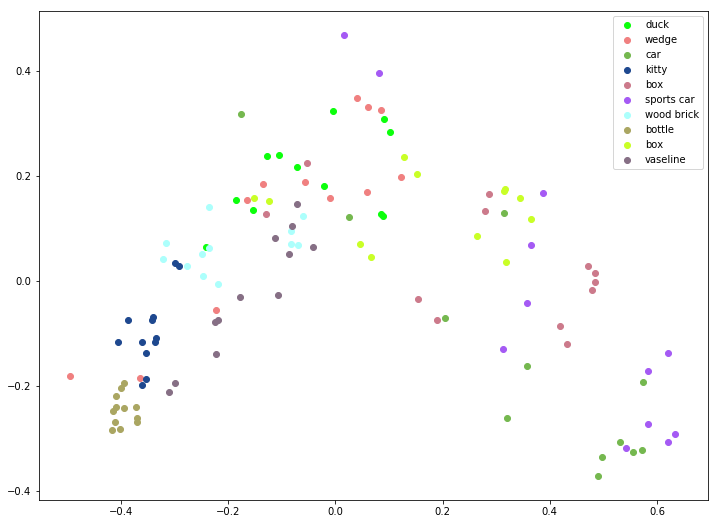

In [33]:
pca = PCA()

imgs_pca = pca.fit_transform(imgs)

rec_error = (np.linalg.norm(
  pca.inverse_transform(imgs_pca) -
  imgs))

signed_scatterplot(imgs_pca)
plt.show()

## Locally Linear Embedding

In [34]:
lle = LocallyLinearEmbedding(n_neighbors=12)
%time imgs_lle = lle.fit_transform(imgs)

CPU times: user 784 ms, sys: 32 ms, total: 816 ms
Wall time: 802 ms


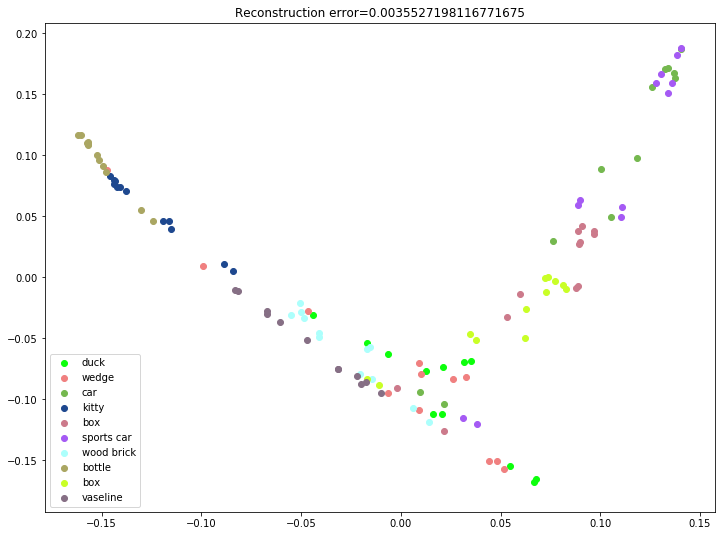

In [35]:
plt.title('Reconstruction error={}'.format(lle.reconstruction_error_))
signed_scatterplot(imgs_lle)
plt.show()

## Isomap

In [36]:
isomap = Isomap(n_neighbors=12)
%time imgs_isomap = isomap.fit_transform(imgs)

CPU times: user 564 ms, sys: 4 ms, total: 568 ms
Wall time: 561 ms


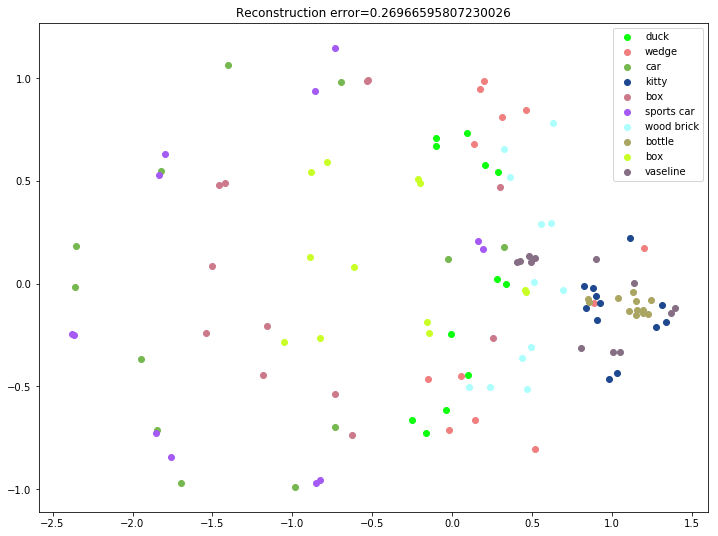

In [37]:
plt.title('Reconstruction error={}'.format(isomap.reconstruction_error()))
signed_scatterplot(imgs_isomap)
plt.show()